# Assignment 10 - Akash

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

url = ('https://raw.githubusercontent.com/Upward-Spiral-Science/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # Remove lable row

# Clip data based on thresholds on x and y coordinates. Found from Bijan visual
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]: #check x inbounds
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]: #check y inbounds
        return False
    if row[3] == 0:                                  # remove zeros of unmasked values
        return False
    return True

indices_in_bound = np.where(np.apply_along_axis(check_in_bounds, 1, csv, x_bounds, y_bounds))
data_clipped = csv[indices_in_bound]

density = np.divide(data_clipped[:, 4],data_clipped[:, 3])*(64**3)

data_density = np.vstack((data_clipped[:,0],data_clipped[:,1],data_clipped[:,2],density))
data_density = data_density.T

print 'End removing zero unmasked and removing image edges'

End removing zero unmasked and removing image edges


## Explore the spike

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.pipeline import Pipeline
from sklearn import cross_validation



## Cluster Explore

[0, 0, 0, 0]
# of samples in cluster 1: 11711
centroid:  [ 1917.13209803  2728.47186406   615.84809154   198.53145688]
cluster covariance: 
[[ 694228.44377834    3332.46934469    7326.98104205   -1012.57378398]
 [   3332.46934469  107527.12745339    4160.96306116    5206.7114939 ]
 [   7326.98104205    4160.96306116  136933.01936421    5244.09632285]
 [  -1012.57378398    5206.7114939     5244.09632285    8083.49441601]]
determinant of covariance matrix:  7.79740049612e+19

# of samples in cluster 2: 12042
centroid:  [ 2833.85301445  2154.5284006    612.52566019   353.56146845]
cluster covariance: 
[[ 177410.44297281   16206.91107624    1131.72132037    5275.82609097]
 [  16206.91107624  149135.43649091    2950.29185485    -312.71782313]
 [   1131.72132037    2950.29185485  116401.02869953    -719.86939832]
 [   5275.82609097    -312.71782313    -719.86939832    6058.23769379]]
determinant of covariance matrix:  1.79573855756e+19

# of samples in cluster 3: 12283
centroid:  [ 1155.1182

<function matplotlib.pyplot.show>

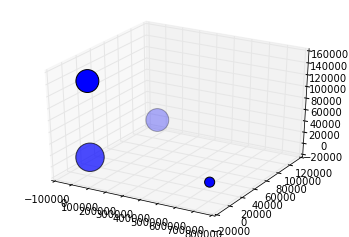

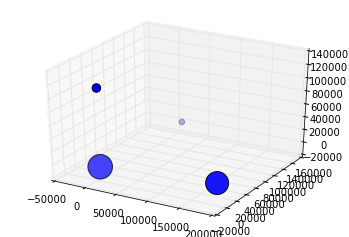

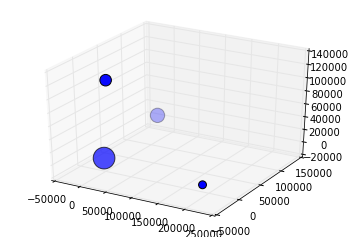

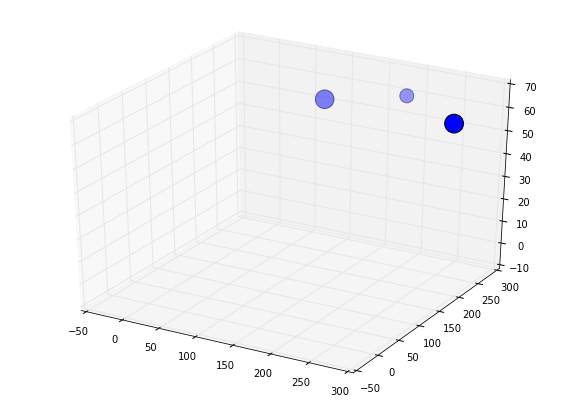

In [38]:
n_clusters = 3
###########################################
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag', random_state=1)
clusters = [[] for i in xrange(n_clusters)]
centroidmatrix = [0]*4
print centroidmatrix

predicted = gmm.fit_predict(data_density)
for label, row in zip(predicted, data_density[:,]):
    clusters[label].append(row)

    
for i in xrange(n_clusters):
    clusters[i] = np.array(clusters[i])
    print "# of samples in cluster %d: %d" % (i+1, len(clusters[i])) 
    print "centroid: ", np.average(clusters[i], axis=0)
    centroidmatrix = np.vstack((centroidmatrix,np.average(clusters[i], axis=0)))
    print "cluster covariance: "
    covar = np.cov(clusters[i].T)
    print covar
    print "determinant of covariance matrix: ", np.linalg.det(covar)
    print
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(
       covar[:, 0], covar[:, 1], covar[:, 2],  # data
       c='blue',  # marker colour
       marker='o',  # marker shape
       s=np.absolute(covar[:,3])/10  # marker size
    )
    plt.show

print centroidmatrix

centroidmatrix /= 10

print centroidmatrix

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.scatter(
       centroidmatrix[:, 0], centroidmatrix[:, 1], centroidmatrix[:, 2],  # data
       c='blue',  # marker colour
       marker='o',  # marker shape
       s=centroidmatrix[:,3]*10  # marker size
)




plt.show

## Regression